### Code Threshold, blue screen

**Additional resources**: 
 
 - Color picker to choose boundaries: https://www.w3schools.com/colors/colors_picker.asp

In [55]:
import matplotlib.pyplot as plt 
import matplotlib.image as pmimg 
import numpy as np
import cv2 

%matplotlib inline

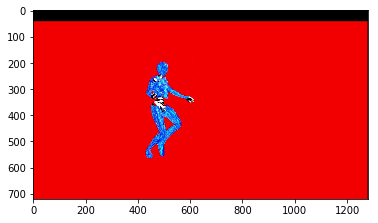

In [21]:
# next we read or image using cv2.imread()

img = cv2.imread('images/robot_blue.jpg')
plt.imshow(img)

Let's print the info about an image: what **type of data** it is and it's **dimensions**.

In [22]:
print('Type of data: ', type(img))
print('Shape of image: ', img.shape)

Type of data:  <class 'numpy.ndarray'>
Shape of image:  (720, 1280, 3)


But note, that opencv reads images as **BGR, not RGB** - as a result, images can look differently.<br>
In particular - **red and blue colors are in reverse order**.<br>
Now, let's take a copy of image and change it from BGR to RGB. Note, that any transformations, applied to a copy will not effect an image. 

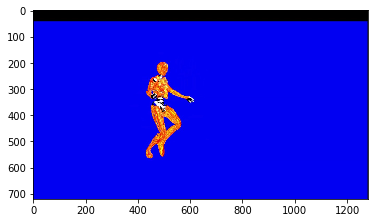

In [23]:
"""
- make a copy with numpy
- change from BGR to RGB 
"""

img_copy = np.copy(img)

img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
plt.imshow(img_copy)

### Color threshold 

Now, let's define color threshold. It will be a **lower and upper bounds** of the color I want to isolate - **blue**.<br>
Here we need to specify **3 values** - for each color - red, green and blue. <br>
**Lower bound**: red and green as zero, but blue - high value. For example, 230.<br>
**Upper bound**: red, green - some small values and blue - maximum, i.e. 250. So, allow a bit red and green.<br>
All values within this range will be considered as **intense blue color**. This range will be replaced by another background.

In [27]:
"""
- rule of thumb for green background: lower: (36, 25, 25), upper: (70, 255,255)
"""
blue_lower = np.array([0, 0, 230])
blue_upper = np.array([50, 50, 250])

### Creating Mask

Then, we will use a common way to isolate choosen area and do smth with this - **create a mask**.<br>
Now, we will isolate blue background area using **inRange()** function.<br>
It will ask each pixel - wheather it falls into **specific range, defined by lower and upper bounds**. <br>

- If it falls - the white mask will be displayed;
- If it does not fall within the range - pixel will be turned into black. 

Simply saying - **everything inside the interaval will be white**. 

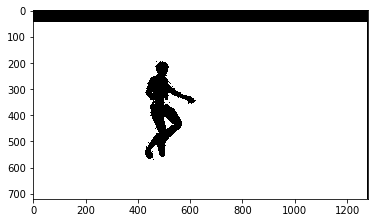

In [30]:
"""
- function will take lower and upper bounds of image 
- and difine the mask
"""
mask = cv2.inRange(img_copy, blue_lower, blue_upper)
plt.imshow(mask, cmap = 'gray')

**White area** - area, where image will be displayed.<br>
**Black area** - where image will be blocked out. 

The mask has the **same height and width**, and each pixel has 2 values: 
- 255 - for white area;
- 0 - for black area.

Now, let's put our object into a mask. First of all, create a **copy of image** (just if we want to change it later on).<br>
And then, one way to separate blue background from this is to check where **blue pixels intersect with mask white pixels**, or in other words - **do not intersect with black (not equal 0)**.<br>
We will set them to black color. And when we display an image, we will see that only object appears on a black background. **Blue background is gone**.

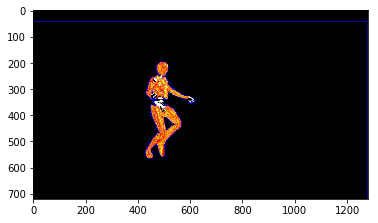

In [37]:
masked_img = np.copy(img_copy)
masked_img[mask!=0] = [0,0,0]

plt.imshow(masked_img)

### Applying new background

Last step will be just to apply **new background on top of black one**. 

First we will take an image, e.g. space image. <br>
Then convert it from BGR to RGB.

In [49]:
background_img = cv2.imread('images/background_img.jpg')
background_img = cv2.cvtColor(background_img, cv2.COLOR_BGR2RGB)

Next we will **crop background image** to make it the same size as our robot image.<br>
We crop it by height and width. 

In [50]:
"""
- cropping to a size of (720, 1280)
"""

crop_background_img = background_img[0:720, 0:1280]

Now, we will do an opposite operation with **cropped background image**.<br>
We will choose **pixels that are equal to 0 in mask image** (black color) and set these pixels to a **black on cropped background image**. 

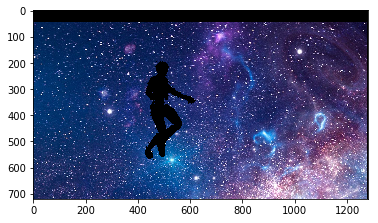

In [52]:
crop_background_img[mask == 0] = [0,0,0]
plt.imshow(crop_background_img)

On above image we see the already see a space background of a robot.

### Final step: add two images together

Since the black area on cropped background image is equivalent to 0, we can **add this image to masked image**.<br>
In this case simple summation will work, since we deal with matrices.

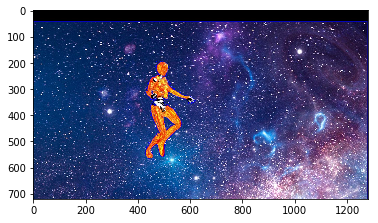

In [54]:
final_image = crop_background_img + masked_img 
plt.imshow(final_image)